In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('WineQT.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.drop(columns=['Id'], inplace=True)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df['citric acid'] = df['citric acid'] + 0.001

In [23]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

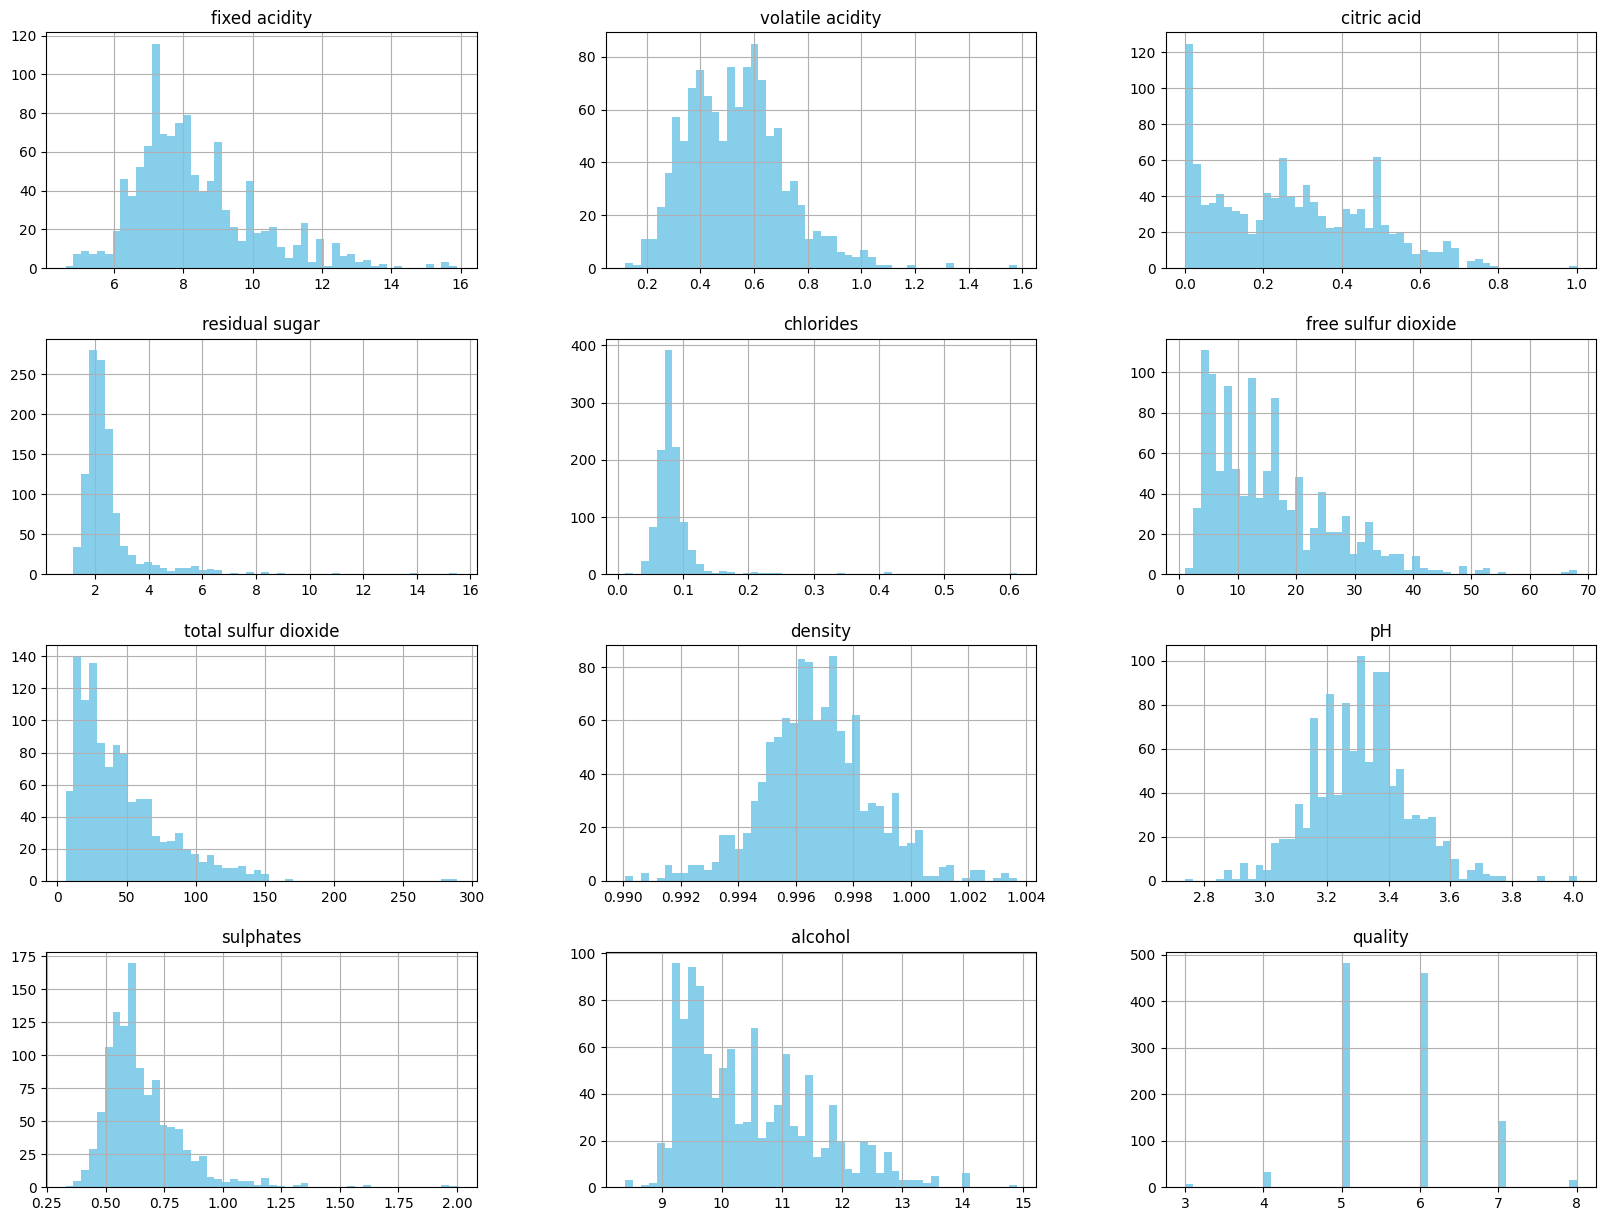

In [25]:
df.hist(bins=50, figsize=(20,15), color='skyblue')
plt.show()

In [7]:
log_columns = ['fixed acidity', 'volatile acidity','residual sugar', 'citric acid', 'chlorides', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']

In [8]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler

In [9]:
transformers = [
    QuantileTransformer(output_distribution='normal', random_state=0),
    PowerTransformer(standardize=True)
]

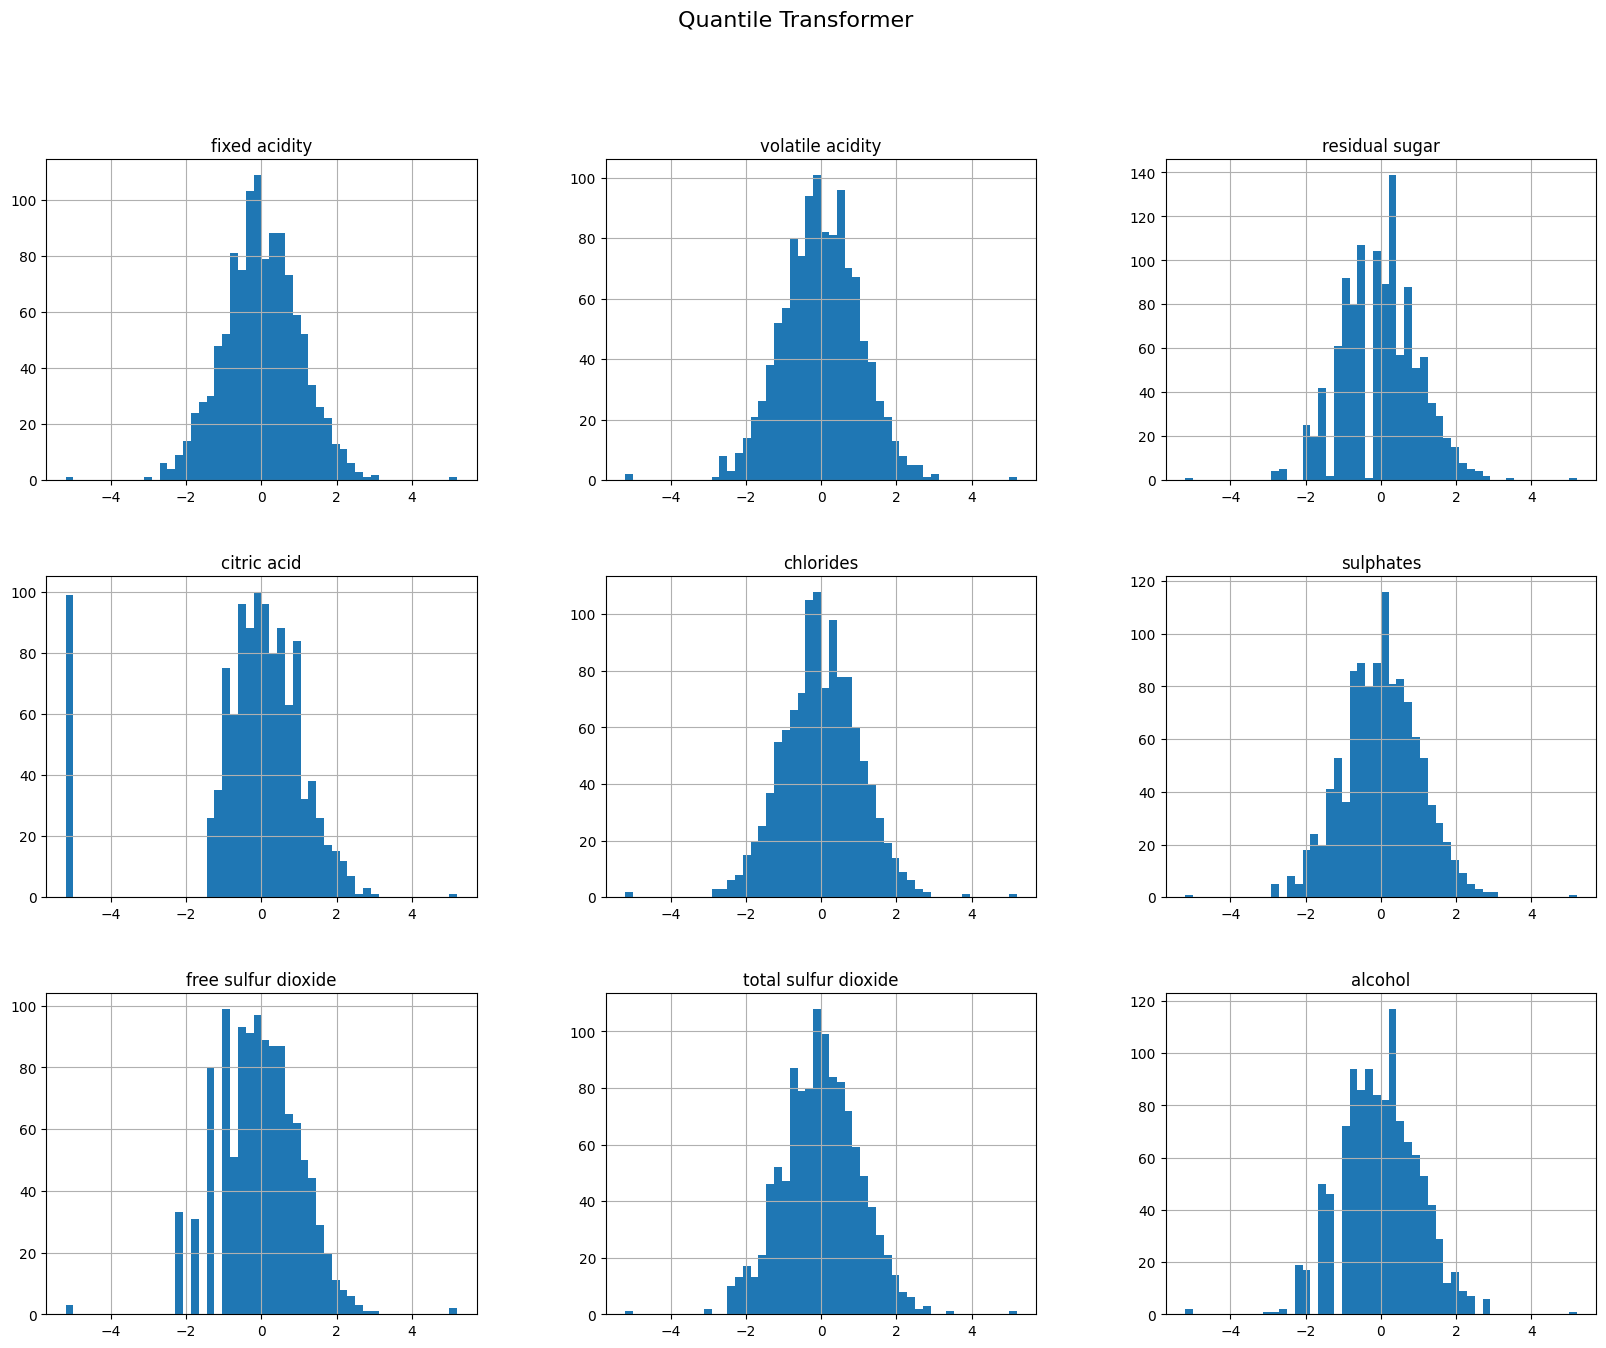

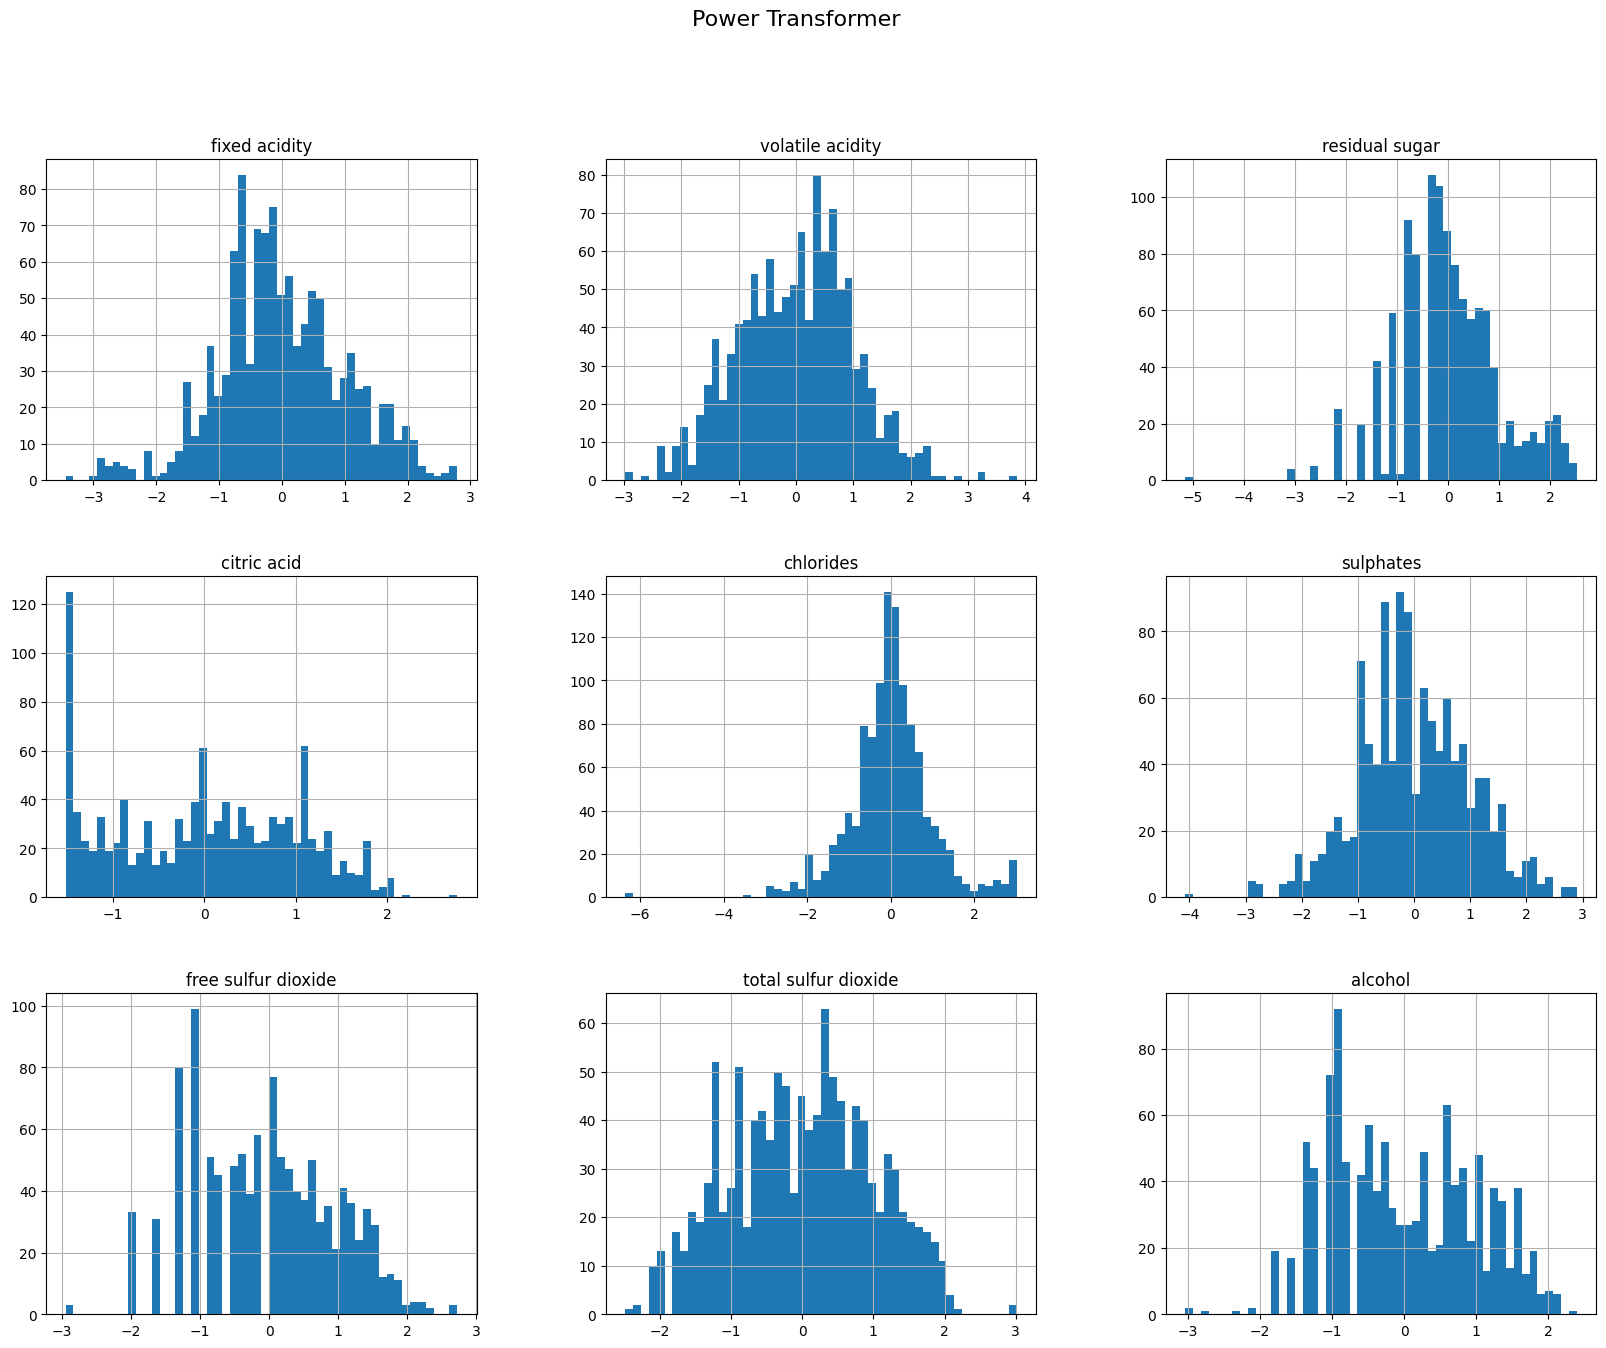

In [10]:
names = ['Quantile Transformer','Power Transformer']
for i, transform in enumerate(transformers):
    transformed_array = transform.fit_transform(df[log_columns])
    df_transformed = pd.DataFrame(transformed_array,columns=log_columns)

    df_transformed.hist(bins=50, figsize=(20,15))
    plt.suptitle(names[i], fontsize=16)
    plt.show()


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('quantile', QuantileTransformer(output_distribution='normal'), log_columns),
    ],
    remainder='passthrough'
)

In [13]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
X.shape

(1143, 11)

In [15]:
y.shape

(1143,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
models = {
    'SVR': SVR(),
    'Random Forest Regressor' : RandomForestRegressor(random_state=42),
    'Elastic Net' : ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

In [19]:
# Model training and accuracy score with preprocessing pipeline

name_model = []
results = []
for model_name, model in models.items():
    name_model.append(model_name)

    pipeline = Pipeline(
        steps=[
            ('Preprocessor', preprocessor),
            (model_name,model)
        ] 
    )

    cv_result = cross_val_score(pipeline, X_train, y_train, cv=5)
    results.append(cv_result)
            

In [20]:
avg_accuracy = []
for i in results:
    avg = np.mean(i)
    avg_accuracy.append(avg)

print(avg_accuracy)

[0.36880413849430604, 0.4195742995314024, 0.3402882448194914]


In [80]:
results

[array([0.59782609, 0.61956522, 0.54347826, 0.61956522, 0.7032967 ,
        0.6043956 , 0.61538462, 0.58241758, 0.51648352, 0.54945055]),
 array([0.35656318, 0.37561855, 0.28415107, 0.36397287, 0.44942497,
        0.43482886, 0.47602805, 0.40162498, 0.27684133, 0.32241888]),
 array([0.37028854, 0.47097037, 0.31285736, 0.46371832, 0.4677321 ,
        0.52644633, 0.49513071, 0.38859806, 0.42311935, 0.36449701]),
 array([0.40645296, 0.32350965, 0.2147257 , 0.34595369, 0.40143487,
        0.37770952, 0.38816528, 0.33403606, 0.29810234, 0.37840663])]

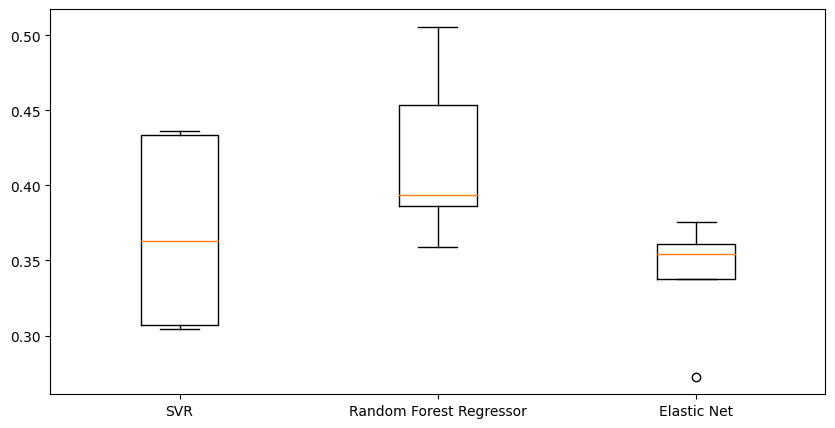

In [21]:
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=name_model)
plt.show()

* We were able to obtain good accuracy with Quantile transformation Preprocessing
* Among all, Logistic Regression preformed better with highest average accuracy in cross_Validation_score


In [24]:

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=pipeline,param_grid=parameters,cv=3,n_jobs=-1,scoring='r2')
cv_score = cross_val_score(gsc,X_train,y_train,cv=3)

print(np.mean(cv_score))


0.42967091126057944


In [28]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quantile',
                                                                         QuantileTransformer(output_distribution='normal'),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'residual '
                                                                          'sugar',
                                                                          'citric '
                                                                          'acid',
                                                                          'chlorides',
                                                                          'sulphates',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'alcohol'])])),
                                       ('Random Forest Reg',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'Random Forest Reg__max_depth': [None, 3, 5, 7],
                         'Random Forest Reg__max_features': [None, 'sqrt'],
                         'Random Forest Reg__min_samples_split': [2, 4, 5, 10],
                         'Random Forest Reg__n_estimators': [50, 100, 180]},
             scoring='r2')

In [25]:
print(np.mean(cv_score))

0.42967091126057944


In [29]:
gsc.best_params_

{'Random Forest Reg__max_depth': None,
 'Random Forest Reg__max_features': 'sqrt',
 'Random Forest Reg__min_samples_split': 4,
 'Random Forest Reg__n_estimators': 50}

In [30]:
gsc.best_score_

0.4379164342643371

In [31]:
ypred = gsc.predict(X_test)

In [32]:
import numpy as np

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('RMSE = ', np.sqrt(mean_squared_error(y_test,ypred)))
print('MAE = ', mean_absolute_error(y_test,ypred))

RMSE =  0.5415537332724694
MAE =  0.40698222083593266


In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.001,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.001,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.041,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.561,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.001,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
